In [1]:
#Import the required library :

import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
import numpy as np
import random

In [2]:
# Define parameters for preprocessing
batch_size = 32
image_size = (256, 256)

In [3]:
# Get the current directory
current_dir = os.getcwd()

# Get the parent directory (one level up)
current_dir = os.path.dirname(current_dir)

# Get the parent directory (one level up)
parent_dir = os.path.dirname(current_dir)

# Print the parent directory
print("Parent Directory:", parent_dir)

Parent Directory: E:\upgrade_capston_project-main


In [4]:
dataset_dir = parent_dir+"/datasets/raw_dataset/Digital images of defective and good condition tyres" # dataset directory

In [5]:
#Load the data with the help of the tensorflow keras utils model :
dataset =  tf.keras.utils.image_dataset_from_directory(dataset_dir ,image_size=image_size)                                                                                 

Found 1856 files belonging to 2 classes.


In [6]:
class_name = dataset.class_names

In [7]:
# Rescaling of Data :
rescale = tf.keras.layers.Rescaling(1./255)


In [8]:
# Data augumenation
data_augmentation = tf.keras.Sequential([tf.keras.layers.RandomFlip('horizontal_and_vertical'),
                                         tf.keras.layers.RandomRotation(0.2),
                                         tf.keras.layers.RandomZoom(0.2)])

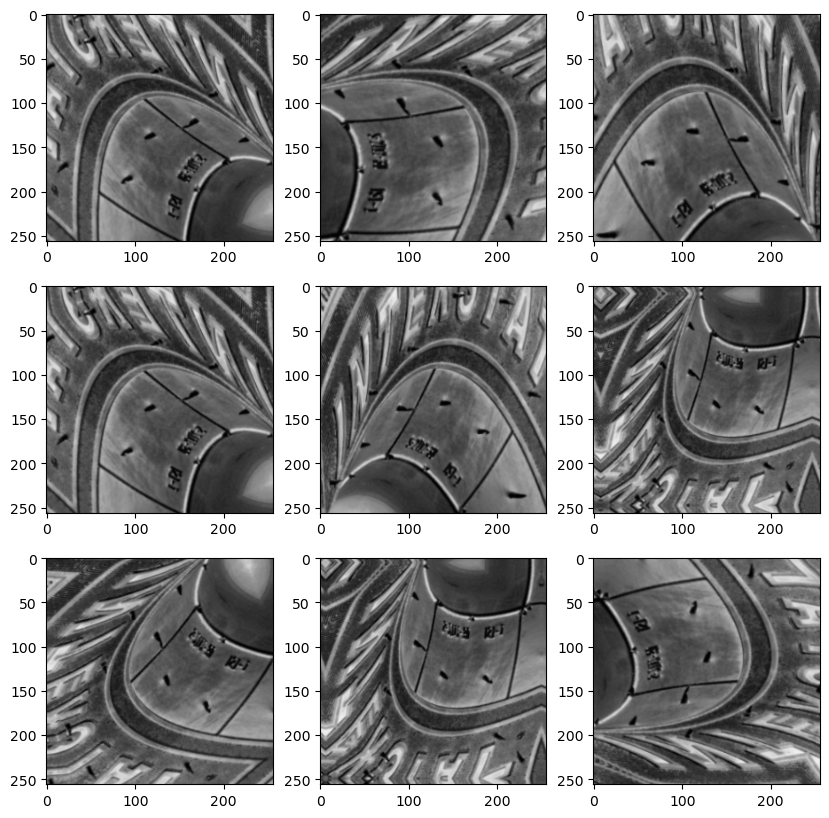

In [9]:
#Visuvalize the Agumentated data :
plt.figure(figsize=(10,10))
for image,_ in dataset.take(1):
    first_image= image[0]
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        agumented_image = data_augmentation(tf.expand_dims(first_image,0))
        plt.imshow(agumented_image[0]/255)
        
        

In [10]:
#Split the Dataset into train ,validation and test 

In [11]:
val_batches = tf.data.experimental.cardinality(dataset)
print("%d"%val_batches)

58


In [12]:
validation_dataset = dataset.take(val_batches//4)
train_dataset = dataset.skip(val_batches//4)

In [13]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
print("%d"%val_batches)

14


In [14]:
test_dataset = validation_dataset.take(val_batches//2)
validation_dataset= validation_dataset.skip(val_batches//2)

In [15]:
#Create Sequentioal model with resacle ad data agumnetation

model = Sequential([rescale,data_augmentation])

In [16]:
# Apply the preprocessing model to your datasets
preprocessed_train_datasets = train_dataset.map(lambda image, labels: (model(image), labels))
preprocessed_test_datasets = test_dataset.map(lambda image, labels: (model(image), labels))
preprocessed_validation_dataset = validation_dataset.map(lambda image, labels: (model(image), labels))


In [17]:
# Save the dataset as a TFRecord file
tf.data.Dataset.save(preprocessed_train_datasets, parent_dir +'/datasets/processed_dataset/cnn_preprocessed_train_datasets.tfrecord')

In [18]:
tf.data.Dataset.save(preprocessed_test_datasets, parent_dir+'/datasets/processed_dataset/cnn_preprocessed_test_datasets.tfrecord')
tf.data.Dataset.save(preprocessed_validation_dataset, parent_dir+'/datasets/processed_dataset/cnn_preprocessed_validation_dataset.tfrecord')